#### Université Paul Sabatier, M2 SID
# Machine learning - Practical, outlier detection


In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as npr
import sklearn as sk

## Question 1: precision recall from scikitlearn

The following code generates $3$ vectors of size $1000$, representing a dataset of size $1000$. `outlier` has entries in $\{0,1\}$ and represents observations corresponding to true outliers (with value $1$). `scoresPredictor` contains outlier scores given by an unknown anomaly detector. `scoresRandom` contains prediction scores from a random presictor.

Use scikitlearn internal functions to represent [precision recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) and compute [area under the curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc) for both the anomaly detector and the random detector.

In [2]:
npr.seed(12)
N = 1000
delta = 0.1
deltaScore = 0.1
temp2 = npr.rand(N)
outlier = (temp2 <= delta) * 1.
scoresPredictor = (npr.rand(N)+deltaScore) * outlier + (npr.rand(N)) * (1-outlier) + npr.rand(N) * 2 * deltaScore 
scoresRandom = npr.rand(N)

(0.0, 1.0)

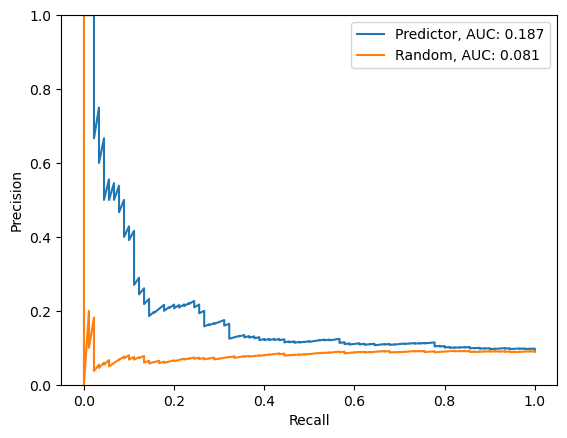

In [3]:
from sklearn.metrics import precision_recall_curve


Represent as a function of the score the precision and the recall for both the anolmaly detector and the random predictor. Read the documentation carefully and make sure you precisely understand the output of [precision recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html). What happens?

Since `scoresRandom` and `scoresPredictor` are not on the same scale, we will use score *quantiles* instead of scores absolute value: 1/n for the smallest score, 2/n for the second smallest ,..., 1 for the largest score. This can be interpreted as the proportion of predicted normal data (Negative Predicted Rate, NPr) if the score was thresholded at the corresponding value. You can use [argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) from numpy to compute quantiles.

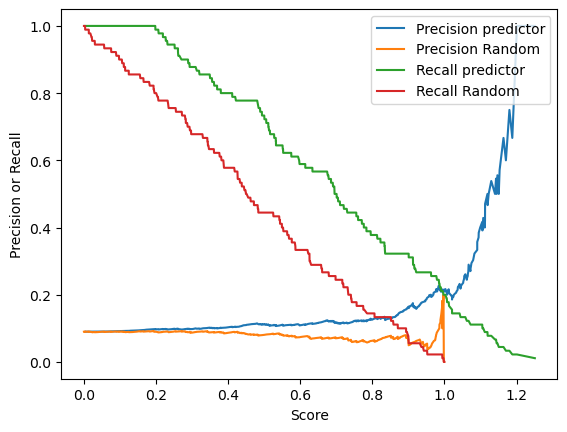

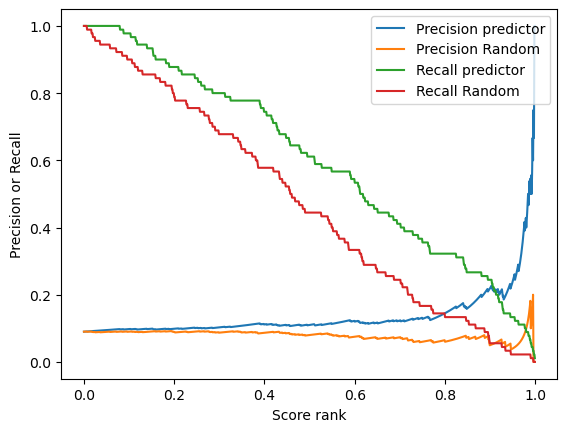

What is the last value provided by [precision recall curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)? Why? Which of these value is an arbitrary choice (precision or recall)? Draw the PR curve after modification of the last precision value. Make a comment regarding the overall aspect of the obtained curve.

(0.0, 1.0)

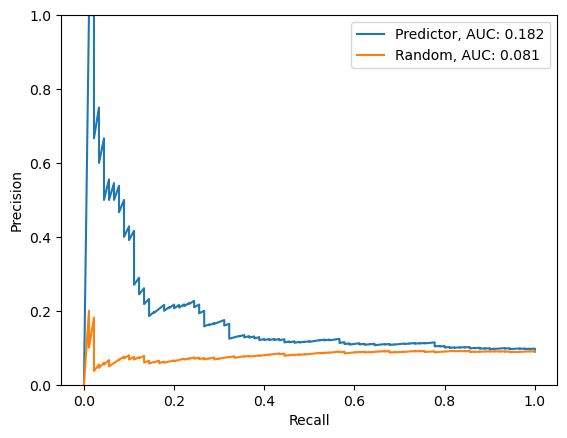

## Question 2: compare ROC and PR curves
Consider $N$ observation and $p\leq N/4$ outliers. We will compare formal detectors with known behavior, each will be represented by a shuffled sequence of numbers from $1$ to $N$.

We will compare three detectors:
- A "completely random" detector which predicts outlier score independantly at random
- A "perfect then random" detector, which attributes the highest score to half of the outliers ($p/2$) and then performs random detection for the remaining $N - p/2$ observations
- A "random then perfect" which provides the highest scores randomly on a subset of data which contains $4p$ observations, including the $p$ outliers, and then predicts the remaining smaller scores for the last $N - 4p$ observations

Write the code to simulate these three detectors (example below for $N = 20$ and $p=4$). You can use [npr.choice](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html) with `replace = False` to shuffle lists or arrays and [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) to concatenate arrays.

Outliers ground truth  Random detector  Perfect then random  \
0                       1                1                   20   
1                       1                7                   19   
2                       1               11                    3   
3                       1               13                    7   
4                       0                6                    8   
5                       0                4                   12   
6                       0               10                   13   
7                       0               12                    4   
8                       0               15                   18   
9                       0               16                    1   
10                      0               19                   11   
11                      0                2                   17   
12                      0               20                    2   
13                      0                8                   14   
14                      0                5                   15   
15                      0               17                    9   
16                      0               18                   16   
17                      0                3                    5   
18                      0               14                    6   
19                      0                9                   10   

    Random then perfect  
0                    17  
1                    18  
2                    13  
3                    15  
4                    10  
5                    16  
6                     5  
7                    19  
8                    14  
9                    12  
10                    6  
11                    8  
12                   20  
13                   11  
14                    7  
15                    9  
16                    4  
17                    3  
18                    2  
19                    1

For `N=10000` and `p=100`, using the formal detectors above, compare ROC curves and precision recall curve. Make comments on the results that you get. Try to describe practical situations in which one detector is more favorable than the other?

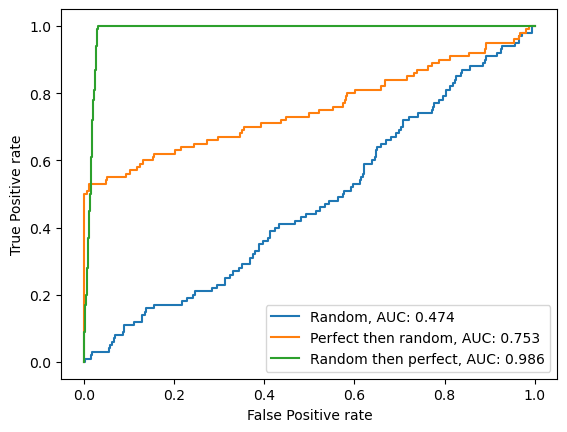

In [7]:
from sklearn.metrics import roc_curve


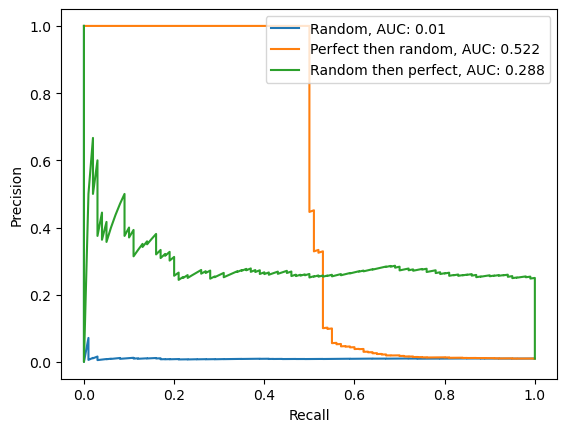

In [8]:
from sklearn.metrics import precision_recall_curve


## Question 3: score versus prediction
Same question as above, but this time, the detectors are not represented by scores (list of numbers between 1 and $N$), but rather by their actual prediction (list of numbers in $\{0,1\}$). An example is given below. Comment on the result that you get. Why do you observe such outputs? Would you recommend to use scores or predictions to evaluate models using AUC metrics?

Outliers ground truth  Random detector  Perfect then random  \
0                       1                0                    1   
1                       1                0                    1   
2                       1                0                    0   
3                       1                0                    0   
4                       0                0                    0   
5                       0                0                    0   
6                       0                0                    0   
7                       0                0                    0   
8                       0                0                    1   
9                       0                0                    0   
10                      0                1                    0   
11                      0                0                    1   
12                      0                1                    0   
13                      0                0                    0   
14                      0                0                    0   
15                      0                1                    0   
16                      0                1                    0   
17                      0                0                    0   
18                      0                0                    0   
19                      0                0                    0   

    Random then perfect  
0                     1  
1                     1  
2                     0  
3                     0  
4                     0  
5                     0  
6                     0  
7                     1  
8                     0  
9                     0  
10                    0  
11                    0  
12                    1  
13                    0  
14                    0  
15                    0  
16                    0  
17                    0  
18                    0  
19                    0

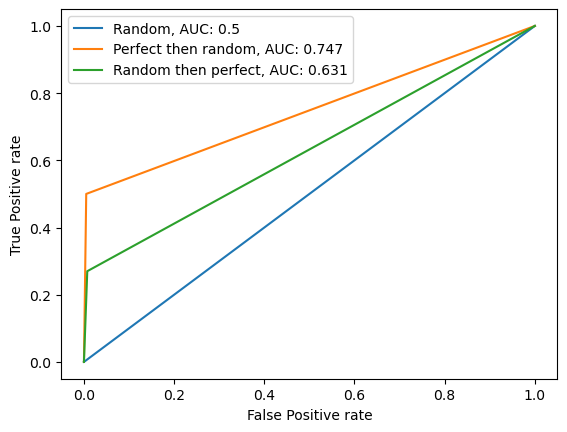

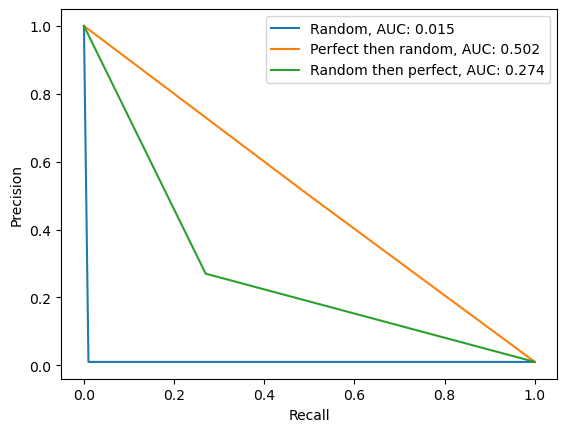

In [2]:
import numpy as np
import numpy.random as npr
import sklearn as sk
from sklearn.metrics import precision_recall_curve

scoresPredictor = np.arange(100)
groundTruth = np.concatenate((np.zeros(50), np.ones(50)))

precision_PR, recall_PR, thresholds_PR = precision_recall_curve(groundTruth, scoresPredictor)

print(len(np.unique(scoresPredictor)))
print(len(thresholds_PR))

100
100
